In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [40]:
df = pd.read_excel("Waite First Securities.xls", sheet_name="Returns")
df1 = df.drop(["No.", "Yr.", "Mo."], axis=1)
df1

*** formula/tFuncVar unknown FuncID:255
*** formula/tFuncVar unknown FuncID:255


,Risk Free,S&P 500,Apple Computer,Intel Corp.,Safeway
0,0.0036,0.04101,0.00611,0.18872,-0.07897
1,0.0037,-0.03228,-0.15478,-0.14872,0.02895
2,0.0037,0.03879,0.03232,-0.00886,-0.11147
3,0.0036,0.03794,0.28000,0.02944,0.05116
4,0.0038,-0.02497,-0.04212,-0.11596,-0.13789
...,...,...,...,...,...
67,0.0012,0.00229,0.06648,-0.12510,-0.04401
68,0.0014,0.00936,0.12351,-0.05777,-0.04406
69,0.0015,0.01401,0.35226,0.10967,-0.05541
70,0.0017,0.03859,0.27958,0.00719,0.05702


In [41]:
df1["mrp"]= df1["S&P 500"]-df1["Risk Free"]
df1["arp"]= df1["Apple Computer"]-df1["Risk Free"]
df1["irp"]= df1["Intel Corp."]-df1["Risk Free"]
df1["srp"]= df1["Safeway"]-df1["Risk Free"]
df1

,Risk Free,S&P 500,Apple Computer,Intel Corp.,Safeway,mrp,arp,irp,srp
0,0.0036,0.04101,0.00611,0.18872,-0.07897,0.03741,0.00251,0.18512,-0.08257
1,0.0037,-0.03228,-0.15478,-0.14872,0.02895,-0.03598,-0.15848,-0.15242,0.02525
2,0.0037,0.03879,0.03232,-0.00886,-0.11147,0.03509,0.02862,-0.01256,-0.11517
3,0.0036,0.03794,0.28000,0.02944,0.05116,0.03434,0.27640,0.02584,0.04756
4,0.0038,-0.02497,-0.04212,-0.11596,-0.13789,-0.02877,-0.04592,-0.11976,-0.14169
...,...,...,...,...,...,...,...,...,...
67,0.0012,0.00229,0.06648,-0.12510,-0.04401,0.00109,0.06528,-0.12630,-0.04521
68,0.0014,0.00936,0.12351,-0.05777,-0.04406,0.00796,0.12211,-0.05917,-0.04546
69,0.0015,0.01401,0.35226,0.10967,-0.05541,0.01251,0.35076,0.10817,-0.05691
70,0.0017,0.03859,0.27958,0.00719,0.05702,0.03689,0.27788,0.00549,0.05532


In [42]:
y_cols= ["arp", "irp", "srp"]

In [43]:
X=df1["mrp"]
X.head()

0    0.03741
1   -0.03598
2    0.03509
3    0.03434
4   -0.02877
Name: mrp, dtype: float64

                            OLS Regression Results                            
Dep. Variable:                    arp   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     23.51
Date:                Sun, 14 Feb 2021   Prob (F-statistic):           7.22e-06
Time:                        16:28:26   Log-Likelihood:                 37.965
No. Observations:                  72   AIC:                            -71.93
Df Residuals:                      70   BIC:                            -67.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0315      0.017      1.844      0.0

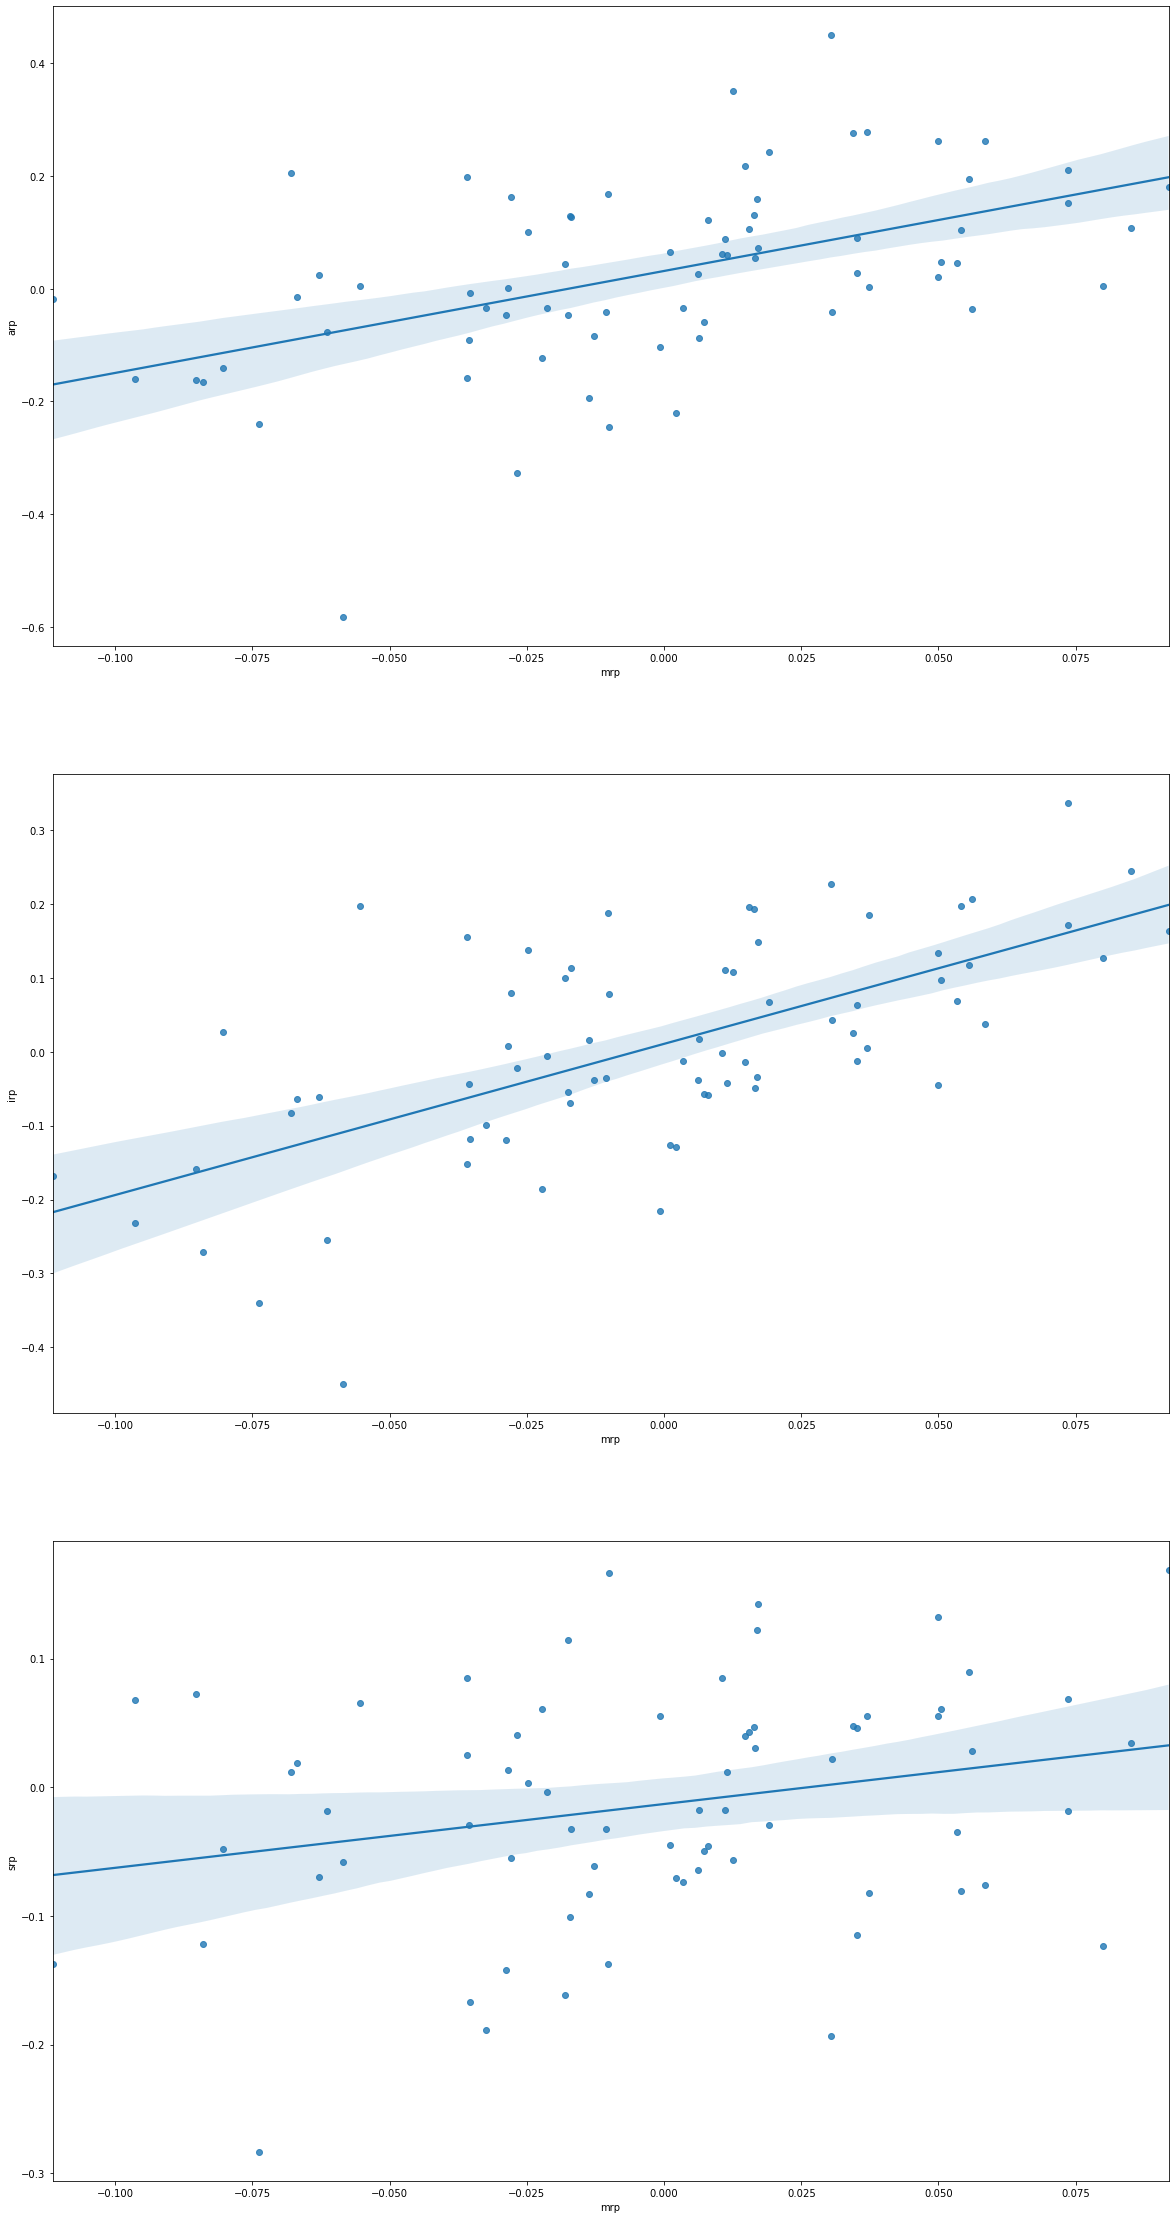

In [44]:
fig, ax = plt.subplots(3,1, figsize=(20,40))
for i, premium in enumerate(y_cols):
    y=df1[premium]
    X1=sm.add_constant(X)
    model= sm.OLS(y,X1)
    result= model.fit()
    sns.regplot(x=X, y=y, ax=ax[i])
    print(result.summary())
    print("\n\n\n")